In [3]:
import pandas as pd
from scipy import stats
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
atgl_data = pd.read_csv('ATGL.csv', parse_dates=['Date'])
adani_green_data = pd.read_csv('ADANIGREEN.csv', parse_dates=['Date'])
adani_energy_data = pd.read_csv('ADANIENSOL.csv', parse_dates=['Date'])

# Step 2: Calculate daily returns based on the Close price

for df in [atgl_data, adani_green_data, adani_energy_data]:
    df['Daily Returns'] = df['Close'].pct_change().dropna()
atgl_data['Stock'] = 'Adani Total Gas'
adani_green_data['Stock'] = 'Adani Green'
adani_energy_data['Stock'] = 'Adani Energy Solutions'

# Concatenating all the data into one DataFrame
combined_data = pd.concat([atgl_data[['Date', 'Stock', 'Daily Returns']], 
                           adani_green_data[['Date', 'Stock', 'Daily Returns']], 
                           adani_energy_data[['Date', 'Stock', 'Daily Returns']]], 
                          ignore_index=True)



# Removing rows with missing values
combined_data = combined_data.dropna(subset=['Daily Returns'])



# Performing ANOVA to test if there's a significant difference between the stocks' returns

grouped_data = [combined_data[combined_data['Stock'] == stock]['Daily Returns'] for stock in combined_data['Stock'].unique()]
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Printing ANOVA results
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in the average returns of the stocks.")
else:
    print("No significant difference in the average returns of the stocks.")



ANOVA Results:
F-statistic: 0.018070426756260093
P-value: 0.9820922755100873
No significant difference in the average returns of the stocks.


C:\Users\ABHIRAM KULKARNI007\AppData\Local\Temp\ipykernel_3892\607512651.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  atgl_data = pd.read_csv('ATGL.csv', parse_dates=['Date'])
C:\Users\ABHIRAM KULKARNI007\AppData\Local\Temp\ipykernel_3892\607512651.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  adani_green_data = pd.read_csv('ADANIGREEN.csv', parse_dates=['Date'])
C:\Users\ABHIRAM KULKARNI007\AppData\Local\Temp\ipykernel_3892\607512651.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  adani_energy_data = pd.read_csv('ADANIENSOL.csv', parse_dates=['Date'])


### **GARCH MODEL**


GARCH Results for Adani Total Gas:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                576.160
Distribution:                  Normal   AIC:                          -1144.32
Method:            Maximum Likelihood   BIC:                          -1130.06
                                        No. Observations:                  261
Date:                Sat, Feb 08 2025   Df Residuals:                      260
Time:                        20:57:12   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -9.88

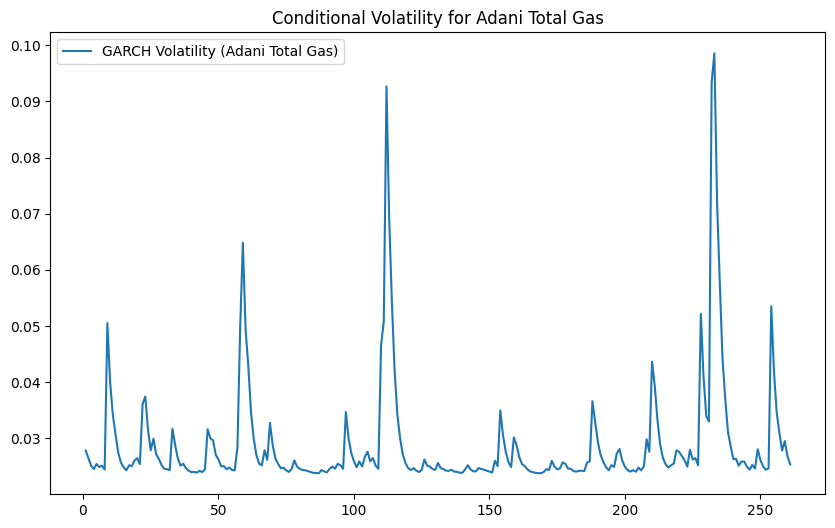


GARCH Results for Adani Green:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                551.479
Distribution:                  Normal   AIC:                          -1094.96
Method:            Maximum Likelihood   BIC:                          -1080.70
                                        No. Observations:                  261
Date:                Sat, Feb 08 2025   Df Residuals:                      260
Time:                        20:57:13   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.1980e-

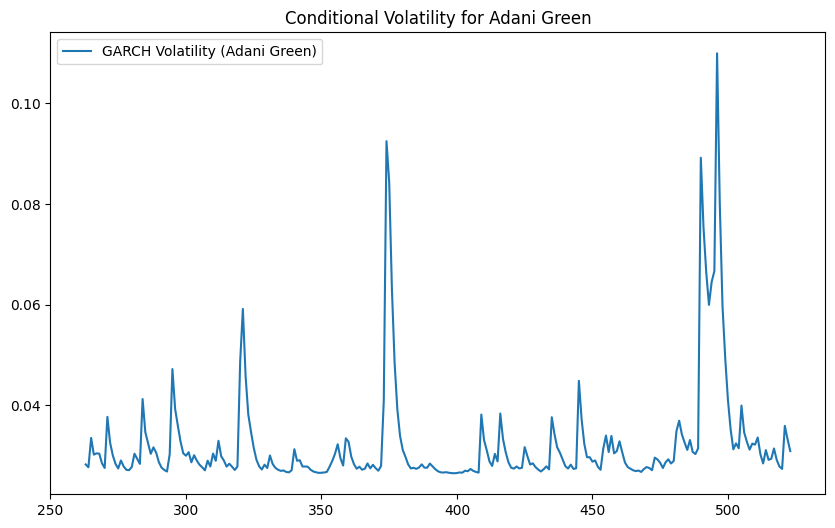


GARCH Results for Adani Energy Solutions:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                527.661
Distribution:                  Normal   AIC:                          -1047.32
Method:            Maximum Likelihood   BIC:                          -1033.06
                                        No. Observations:                  261
Date:                Sat, Feb 08 2025   Df Residuals:                      260
Time:                        20:57:13   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu       

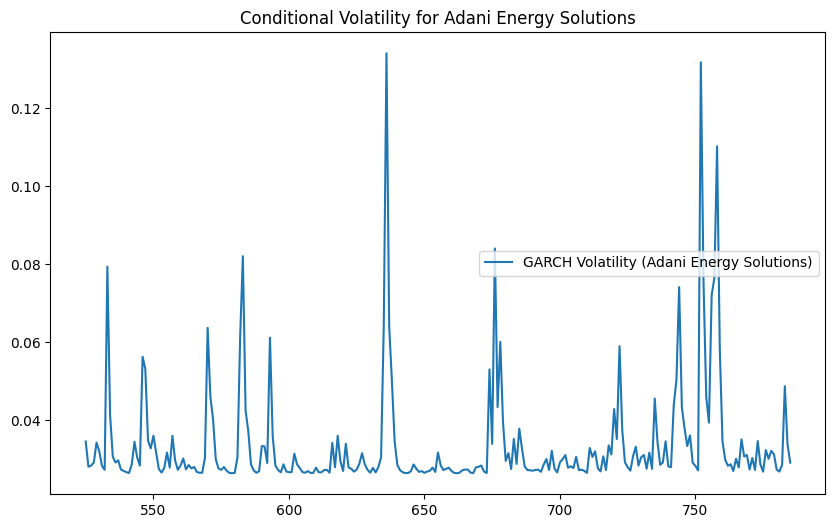

In [6]:
from arch import arch_model
import matplotlib.pyplot as plt

# Perform GARCH analysis for each stock
for stock in combined_data['Stock'].unique():
    stock_data = combined_data[combined_data['Stock'] == stock]['Daily Returns']
    
    # Fit a GARCH(1,1) model
    garch_model = arch_model(stock_data, vol='Garch', p=1, q=1,rescale=False)
    garch_fit = garch_model.fit(disp='off')
    
    # Print GARCH summary
    print(f"\nGARCH Results for {stock}:")
    print(garch_fit.summary())
    
    # Plot conditional volatility
    plt.figure(figsize=(10, 6))
    plt.plot(garch_fit.conditional_volatility, label=f'GARCH Volatility ({stock})')
    plt.title(f'Conditional Volatility for {stock}')
    plt.legend()
    plt.show()


## **SENTIMENT ANALYSIS**

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Example headlines (Replace with actual news or text data)
headlines = [
    "Adani Total Gas stock price faces major fluctuations due to hindenburg report",
    "Adani Green faces major fluctuations due to hindenburg report",
    "Adani Energy Solutions faces major fluctuations due to hindenburg report"
]

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis
sentiment_scores = [analyzer.polarity_scores(headline)['compound'] for headline in headlines]

# Combine sentiment scores with stock names
sentiment_df = pd.DataFrame({
    'Stock': ['Adani Total Gas', 'Adani Green', 'Adani Energy Solutions'],
    'Sentiment': sentiment_scores
})

print("\nSentiment Scores:")
print(sentiment_df)



Sentiment Scores:
                    Stock  Sentiment
0         Adani Total Gas     0.0000
1             Adani Green     0.0000
2  Adani Energy Solutions     0.4215


In [8]:
# Example: Combine sentiment scores with returns
combined_data['Sentiment'] = combined_data['Stock'].map(dict(zip(sentiment_df['Stock'], sentiment_df['Sentiment'])))

# Correlation between sentiment and daily returns
correlation = combined_data[['Daily Returns', 'Sentiment']].corr()
print("\nCorrelation between Sentiment and Daily Returns:")
print(correlation)


Correlation between Sentiment and Daily Returns:
               Daily Returns  Sentiment
Daily Returns       1.000000   0.006485
Sentiment           0.006485   1.000000


## **SHARPE RATIO**


Sharpe Ratios:
Stock
Adani Energy Solutions   -0.018962
Adani Green              -0.035618
Adani Total Gas          -0.034187
Name: Daily Returns, dtype: float64


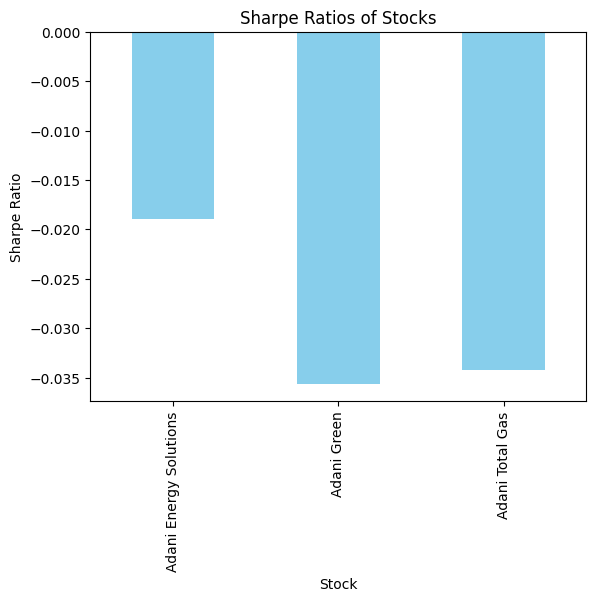

In [9]:
# Define the risk-free rate (e.g., annualized 3% converted to daily)
risk_free_rate = 0.03 / 252

# Calculate Sharpe Ratio for each stock
sharpe_ratios = (
    combined_data.groupby('Stock')['Daily Returns'].mean() - risk_free_rate
) / combined_data.groupby('Stock')['Daily Returns'].std()

print("\nSharpe Ratios:")
print(sharpe_ratios)

# Plot Sharpe Ratios
sharpe_ratios.plot(kind='bar', color='skyblue', title='Sharpe Ratios of Stocks')
plt.ylabel('Sharpe Ratio')
plt.show()
